> # *Predicting Restaurant Ratings*

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [110]:
df = pd.read_csv('Dataset.csv')

In [111]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [113]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [114]:
df.duplicated().sum()

np.int64(0)

In [115]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [116]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

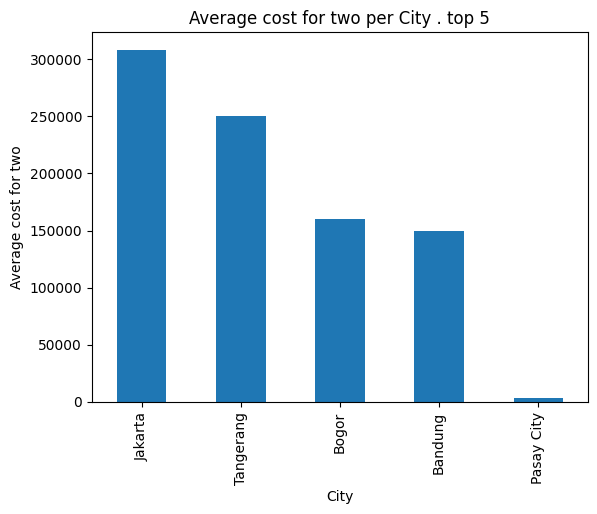

In [117]:
# group by city and calculate average cost 
df.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False).head().plot(kind='bar',)
plt.title('Average cost for two per City . top 5')
plt.xlabel('City')
plt.ylabel('Average cost for two')
plt.show()

In [118]:
# Cuisins total number of votes
data = df.groupby('Cuisines')['Votes'].sum().reset_index()

In [119]:
# data = data[data['Votes'] != 0]

In [120]:
data[data['Votes'] != 0]

,Cuisines,Votes
0,Afghani,39
1,"Afghani, Mughlai, Chinese",2
3,"Afghani, North Indian, Pakistani, Arabian",3
4,African,373
5,"African, Portuguese",265
...,...,...
1820,"Western, Asian, Cafe",259
1821,"Western, Fusion, Fast Food",32
1822,World Cuisine,95
1823,"World Cuisine, Mexican, Italian",115


In [121]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

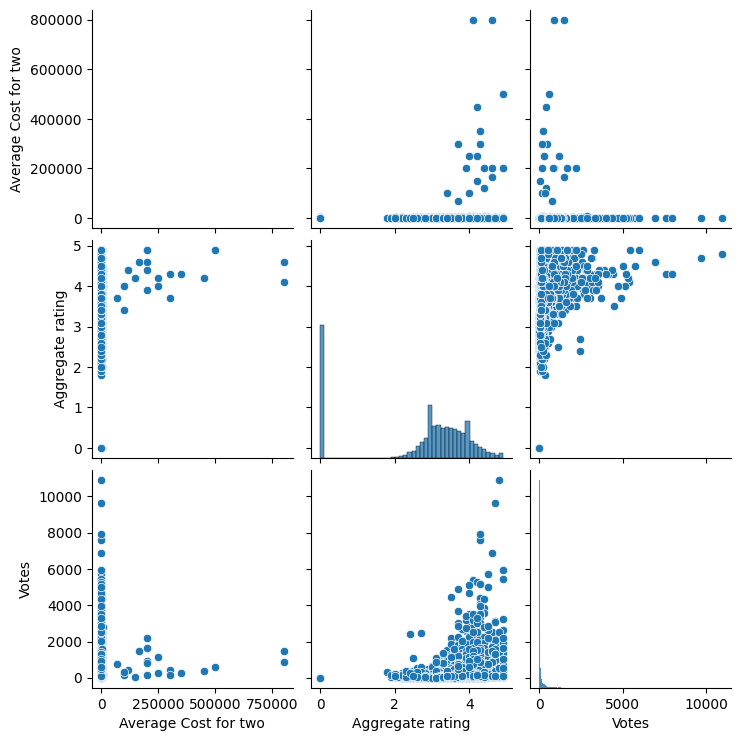

In [122]:
sns.pairplot(df[['Average Cost for two','Aggregate rating','Votes']])
plt.show()

In [123]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

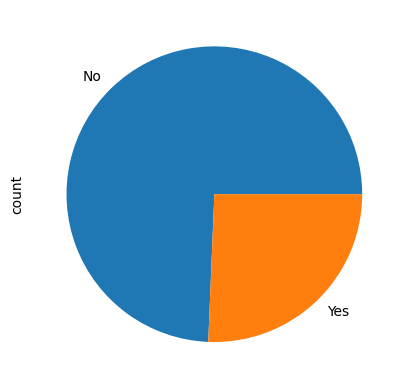

In [124]:
df['Has Online delivery'].value_counts().plot(kind='pie')
plt.show()

In [125]:
data2 = df[['Aggregate rating','Rating text']].sort_values(by='Aggregate rating',ascending=True).reset_index()

In [126]:
data2['Rating text'].value_counts()

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

In [127]:
s = set(data2['Rating text'].values.tolist())

In [128]:
s

{'Average', 'Excellent', 'Good', 'Not rated', 'Poor', 'Very Good'}

In [129]:
data2.groupby('Rating text')['Aggregate rating'].agg(['min','max','count']).sort_values(by='min')


,min,max,count
Rating text,,,
Not rated,0.0,0.0,2148
Poor,1.8,2.4,186
Average,2.5,3.4,3737
Good,3.5,3.9,2100
Very Good,4.0,4.4,1079
Excellent,4.5,4.9,301


In [130]:
df = df[df['Rating text'] != 'Not rated']

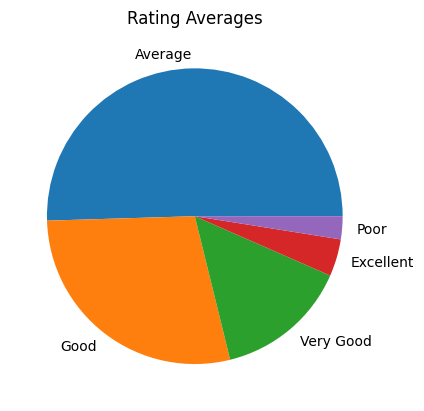

In [131]:
df['Rating text'].value_counts().plot(kind='pie')
plt.title('Rating Averages')
plt.ylabel("")
plt.show()


In [132]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [133]:
X = df[['Average Cost for two','Has Table booking', 'Has Online delivery','Price range']]

In [134]:
y = df[['Aggregate rating']]

In [135]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,Yes,No,3
1,1200,Yes,No,3
2,4000,Yes,No,4
3,1500,No,No,4
4,1500,Yes,No,4
...,...,...,...,...
9546,80,No,No,3
9547,105,No,No,3
9548,170,No,No,4
9549,120,No,No,4


In [136]:
X['Price range'].value_counts()

Price range
1    2744
2    2711
3    1373
4     575
Name: count, dtype: int64

In [137]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

In [138]:
X['Has Table booking'] = labelEncoder.fit_transform(X['Has Table booking'])

In [139]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,No,3
1,1200,1,No,3
2,4000,1,No,4
3,1500,0,No,4
4,1500,1,No,4
...,...,...,...,...
9546,80,0,No,3
9547,105,0,No,3
9548,170,0,No,4
9549,120,0,No,4


In [140]:
X['Has Online delivery'] = labelEncoder.fit_transform(X['Has Online delivery'])

In [141]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,0,3
1,1200,1,0,3
2,4000,1,0,4
3,1500,0,0,4
4,1500,1,0,4
...,...,...,...,...
9546,80,0,0,3
9547,105,0,0,3
9548,170,0,0,4
9549,120,0,0,4


In [142]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X = standardScaler.fit_transform(X)

In [143]:
X

array([[-0.0190367 ,  2.37978283, -0.68302371,  1.10671644],
       [-0.0135729 ,  2.37978283, -0.68302371,  1.10671644],
       [ 0.13941344,  2.37978283, -0.68302371,  2.18135204],
       ...,
       [-0.06985002, -0.42020641, -0.68302371,  2.18135204],
       [-0.07258191, -0.42020641, -0.68302371,  2.18135204],
       [-0.07613338, -0.42020641, -0.68302371,  0.03208084]])

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [145]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

In [146]:
def model_results(model,prediction):
    print(model)
    print('-'*100)
    print(f"Mean Absolute Error :{mean_absolute_error(y_test,prediction)}")
    print(f"Mean Squared  Error : {np.sqrt(mean_squared_error(y_test,prediction))}")

In [147]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [148]:
predictionfromlr = lr.predict(X_test)
model_results("LinearRegression", predictionfromlr)

LinearRegression
----------------------------------------------------------------------------------------------------
Mean Absolute Error :0.4095937988689124
Mean Squared  Error : 0.5127825996502119


In [149]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR()
param_gridsvr = {"C":[0.1,0.5], "kernel":['linear','poly'], "degree": [2]}
gridsvr = GridSearchCV(svr,param_gridsvr)
gridsvr.fit(X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5], 'degree': [2],
                         'kernel': ['linear', 'poly']})

In [150]:
predictiongridsvr = gridsvr.predict(X_test)
model_results('SVR with GridSearchCV',predictiongridsvr)

SVR with GridSearchCV
----------------------------------------------------------------------------------------------------
Mean Absolute Error :0.40775624828285373
Mean Squared  Error : 0.5160049129402786


In [151]:
from sklearn.tree import DecisionTreeRegressor
param_grid = {
    'max_depth':[10,30],
    'min_samples_leaf':[1,2],
    'min_samples_split':[2,5]
}
dtr = DecisionTreeRegressor()
grid_dtr = GridSearchCV(dtr,param_grid=param_grid,)
grid_dtr.fit(X_train,y_train)


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 30], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [152]:
prediction_dtr = grid_dtr.predict(X_test)
model_results(model="DecisionTreeRegressor",prediction=prediction_dtr)

DecisionTreeRegressor
----------------------------------------------------------------------------------------------------
Mean Absolute Error :0.37321560619981275
Mean Squared  Error : 0.475316553433367


In [153]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
param_grid_rfr = {
    'max_depth':[5,15],
    'n_estimators':[2,5,10]
}
grid_rfr = GridSearchCV(rfr,param_grid=param_grid_rfr)
grid_rfr.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 5, 10]})

In [154]:
prediction_rfr = grid_rfr.predict(X_test)
model_results("RandomForestRegressor",prediction_rfr)

RandomForestRegressor
----------------------------------------------------------------------------------------------------
Mean Absolute Error :0.3686325078763063
Mean Squared  Error : 0.4684720341399565


In [155]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
param_grid_knn = {
    "n_neighbors":[9,11,13,15,17],
    "weights":['uniform','distance']
}
grid_knn = GridSearchCV(knn,param_grid_knn)
grid_knn.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [9, 11, 13, 15, 17],
                         'weights': ['uniform', 'distance']})

In [156]:
prediction_knn = grid_knn.predict(X_test)
model_results('KNeighborsRegressor',prediction_knn)

KNeighborsRegressor
----------------------------------------------------------------------------------------------------
Mean Absolute Error :0.3791436628669023
Mean Squared  Error : 0.48300062497194163


In [157]:
grid_knn.best_params_

{'n_neighbors': 17, 'weights': 'uniform'}

In [158]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada_param_grid = {
    'n_estimators':[50,100,200],
    'learning_rate':[0.1,0.5,1]
}
grid_ada = GridSearchCV(ada,ada_param_grid)
grid_ada.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200]})

In [159]:
prediction_ada = grid_ada.predict(X_test)
model_results('AdaBoostRegressor',prediction_ada)

AdaBoostRegressor
----------------------------------------------------------------------------------------------------
Mean Absolute Error :0.38101829008813715
Mean Squared  Error : 0.47849514426752193


In [160]:
import joblib 
joblib.dump(grid_rfr,'ML_MODEL.pkl')

['ML_MODEL.pkl']

In [161]:
standardScaler

StandardScaler()

In [162]:
joblib.dump(standardScaler,"Scalar.pkl")

['Scalar.pkl']